# Descripción del proyecto

# Debes realizar una práctica en el departamento de analítica de Showz, una empresa de venta de entradas de eventos. Tu primera tarea es ayudar a optimizar los gastos de marketing.

# Cuentas con: registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018; un archivo con los pedidos en este periodo; estadísticas de gastos de marketing.

# Debes investigar: cómo los clientes usan el servicio; cuándo empiezan a comprar; cuánto dinero aporta cada cliente a la compañía; cuándo los ingresos cubren el costo de adquisición de los clientes.

# Paso 1. Acceda los datos y prepáralos para el análisis

# Importar Librerias

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar y cargar datos

In [4]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

# Estudiar los datos para el análisis 

In [5]:
df_visits.info()
df_visits.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
df_visits.head(5)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [7]:
df_orders.info()
df_orders.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [8]:
df_orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [9]:
df_costs.info()
df_costs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [10]:
df_costs.head(5)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


# Optimizar los datos para el análisis 

In [11]:
df_visits.columns = [col.lower() for col in df_visits.columns]

df_visits.columns = df_visits.columns.str.replace(' ', '_')

print(df_visits.columns)

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')


In [12]:
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [13]:
df_orders.columns = [col.lower() for col in df_orders.columns]

df_orders.columns = df_orders.columns.str.replace(' ', '_')

print(df_orders.columns)

Index(['buy_ts', 'revenue', 'uid'], dtype='object')


In [14]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
df_costs.columns = [col.lower() for col in df_costs.columns]

df_costs.columns = df_costs.columns.str.replace(' ', '_')

print(df_costs.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


In [16]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


# Paso 2. Haz informes y calcula métricas 

# 1. Visitas:

# 1. ¿Cuántas personas lo usan cada día, semana y mes?

In [17]:
df_visits['visit_date'] = df_visits['start_ts'].dt.date

daily_unique_users = df_visits.groupby('visit_date').agg({'uid': 'nunique'})

daily_unique_users.index = pd.to_datetime(daily_unique_users.index)

print("Usuarios por día:\n", daily_unique_users.head(15))

Usuarios por día:
             uid
visit_date     
2017-06-01  605
2017-06-02  608
2017-06-03  445
2017-06-04  476
2017-06-05  820
2017-06-06  797
2017-06-07  699
2017-06-08  868
2017-06-09  695
2017-06-10  350
2017-06-11  292
2017-06-12  335
2017-06-13  502
2017-06-14  499
2017-06-15  575


In [18]:
weekly_unique_users = df_visits.groupby(df_visits['start_ts'].dt.isocalendar().week).agg({'uid': 'nunique'})

print("Usuarios por semana:\n", weekly_unique_users.head())

Usuarios por semana:
        uid
week      
1     6918
2     6703
3     6972
4     7060
5     8111


In [19]:
monthly_unique_users = df_visits.groupby(df_visits['start_ts'].dt.month).agg({'uid': 'nunique'})

print("Usuarios por mes:\n", monthly_unique_users.head(12))

Usuarios por mes:
             uid
start_ts       
1         28716
2         28749
3         27473
4         21008
5         20701
6         13259
7         14183
8         11631
9         18975
10        29692
11        32797
12        31557


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Al darme cuenta que los numeros son tan fluctuantes tanto en dias, semanas y mes, quise realizar un grafico que me mostrara el panorama general, confirmando que la cantidad de usuarios únicos varía significativamente de un día para otro, es quizas debido a diversos factores como campañas de marketing específicas en ciertos días, eventos promocionales o parametros diferentes, incluso problemas técnicos temporales; Ahora bien, la intucion que tenia, relacionada a que efectivamente se presentan picos significativos particularmente el de finales de noviembre de 2017, estos eventos puntuales merecen una investigación más profunda y detallada respondiendonos por ejemplo, ¿Qué pudo haber causado este aumento tan drástico en la cantidad de usuarios únicos en esos días? ¿Hubo alguna campaña de marketing masiva, un evento especial, o quizás se viralizó algún contenido? o estamos teniendo fallas con los servidores? veremos como se desenvuelve durante el proyecto. 
</div>

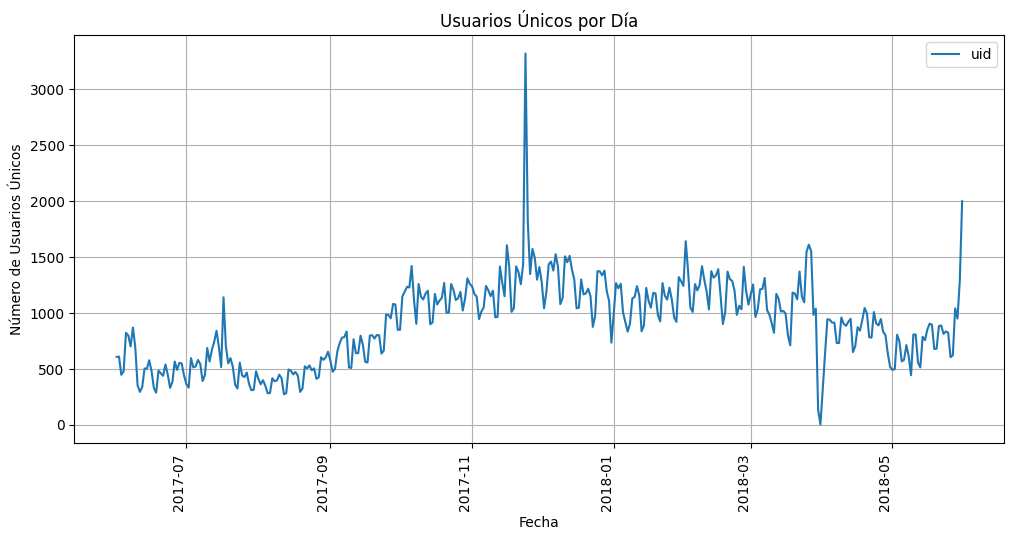

In [20]:
daily_unique_users.plot(figsize=(12, 6),
                        kind='line',
                        title='Usuarios Únicos por Día',
                        xlabel='Fecha',
                        ylabel='Número de Usuarios Únicos',
                        grid=True,
                        rot=90)

plt.show()

# 2. ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).

In [21]:
daily_sessions = df_visits.groupby('visit_date')['uid'].count()

print("Número sesiones por día:\n", daily_sessions.head(15))

Número sesiones por día:
 visit_date
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
2017-06-11    306
2017-06-12    355
2017-06-13    536
2017-06-14    547
2017-06-15    609
Name: uid, dtype: int64


In [22]:
sessions_per_user_daily = daily_sessions / daily_unique_users['uid']

print("Ratio Sesiones de Usuario por Día:\n", sessions_per_user_daily.head(15))

Ratio Sesiones de Usuario por Día:
 visit_date
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
2017-06-06    1.097867
2017-06-07    1.127325
2017-06-08    1.081797
2017-06-09    1.086331
2017-06-10    1.071429
2017-06-11    1.047945
2017-06-12    1.059701
2017-06-13    1.067729
2017-06-14    1.096192
2017-06-15    1.059130
Name: uid, dtype: float64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Determinar el porque de estos picos, me hizo hacer un pequeño ejercicio de Ratio, tratando de observar mas a fondo este comportamiento inusual, y por consiguiente los picos en usuarios y sesiones no son causados por un enganche masivo por parte de un grupo pequeño de usuarios que de repente tienen muchísimas sesiones, no, son causados por muchos más usuarios llegando al sitio, y esos nuevos usuarios se comportan en términos de sesiones por día de forma similar a como lo hace el promedio de usuarios en cualquier otro día; Esto concluye entonces en algo muy importante para el equipo de marketing! Sugeriria que ellos hicieran un enfoque hacia estrategias, que implique atraer más usuarios al sitio, ya que este enganche o la profundidad de la interacción que esta medido por sesiones por usuario, parece ser una característica estable del producto, no la causa principal de los picos, y esto es bastante bueno para la compañia!!! 
</div>

# 3. ¿Cuál es la duración de cada sesión?

In [23]:
df_visits['session_duration_seconds'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds()

print(df_visits[['start_ts', 'end_ts', 'session_duration_seconds']].head())

print("\nEstadística descriptiva de la duración de las sesiones (segundos):\n", df_visits['session_duration_seconds'].describe())

             start_ts              end_ts  session_duration_seconds
0 2017-12-20 17:20:00 2017-12-20 17:38:00                    1080.0
1 2018-02-19 16:53:00 2018-02-19 17:21:00                    1680.0
2 2017-07-01 01:54:00 2017-07-01 01:54:00                       0.0
3 2018-05-20 10:59:00 2018-05-20 11:23:00                    1440.0
4 2017-12-27 14:06:00 2017-12-27 14:06:00                       0.0

Estadística descriptiva de la duración de las sesiones (segundos):
 count    359400.000000
mean        643.025687
std         997.127761
min       -2760.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       42660.000000
Name: session_duration_seconds, dtype: float64


In [24]:
negative_duration_count = df_visits[df_visits['session_duration_seconds'] < 0].shape[0]
total_sessions = df_visits.shape[0]
percentage_negative = (negative_duration_count / total_sessions) * 100

print(f"Número de sesiones con duración negativa: {negative_duration_count}")
print(f"Porcentaje de sesiones con duración negativa: {percentage_negative:.2f}%")

Número de sesiones con duración negativa: 2
Porcentaje de sesiones con duración negativa: 0.00%


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
La duración promedio de las sesiones de los usuarios, calculada estadísticamente, es de 10 minutos y 43 segundos, es una duración se considera razonable para un servicio de venta de tickets, donde se espera que los usuarios ingresen, busquen su información o realicen una compra y luego salgan; Al principio, las estadísticas descriptivas mostraron una duración mínima anómala negativa. Sin embargo, tras una inspección detallada, se confirmó que solo dos (2) de las 359,400 sesiones, un porcentaje insignificante del 0.00%, presentaron una duración de 0 segundos, lo que indica un start_ts y end_ts idénticos, no un valor negativo real en la duración calculada, sugiriendo que la integridad general de los datos de duración es buena y que no hay un problema caótico generalizado con la medición de las sesiones. 
</div>

# 4. ¿Con qué frecuencia los usuarios regresan?

In [25]:
first_visits = df_visits.groupby('uid')['start_ts'].min().dt.date.reset_index()

first_visits.columns = ['uid', 'first_visit_date']

first_visits['first_visit_date'] = pd.to_datetime(first_visits['first_visit_date'])

columns_to_drop = [col for col in ['first_visit_date_x', 'first_visit_date_y', 'first_visit_date'] if col in df_visits.columns]
if columns_to_drop:
    df_visits = df_visits.drop(columns=columns_to_drop)

df_visits = df_visits.merge(first_visits, on='uid', how='left')

print(df_visits.head(5))

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visit_date  session_duration_seconds first_visit_date  
0  16879256277535980062  2017-12-20                    1080.0       2017-12-20  
1    104060357244891740  2018-02-19                    1680.0       2018-02-19  
2   7459035603376831527  2017-07-01                       0.0       2017-07-01  
3  16174680259334210214  2018-05-20                    1440.0       2018-03-09  
4   9969694820036681168  2017-12-27                       0.0       2017-12-27  


In [26]:
df_visits['visit_date'] = pd.to_datetime(df_visits['visit_date'])

df_visits['days_since_first_visit'] = (df_visits['visit_date'] - df_visits['first_visit_date']).dt.days

df_visits['weeks_since_first_visit'] = (df_visits['visit_date'] - df_visits['first_visit_date']).dt.days // 7

df_visits['acquisition_month'] = df_visits['first_visit_date'].dt.to_period('M')
df_visits['visit_month'] = df_visits['visit_date'].dt.to_period('M')

df_visits['months_since_first_visit'] = (df_visits['visit_month'] - df_visits['acquisition_month']).apply(lambda x: x.n)

print("\ndf_visits con columnas de tiempo de vida añadidas:\n", df_visits[['uid', 'first_visit_date', 'visit_date', 'days_since_first_visit', 'weeks_since_first_visit', 'months_since_first_visit']].head(10))


df_visits con columnas de tiempo de vida añadidas:
                     uid first_visit_date visit_date  days_since_first_visit  \
0  16879256277535980062       2017-12-20 2017-12-20                       0   
1    104060357244891740       2018-02-19 2018-02-19                       0   
2   7459035603376831527       2017-07-01 2017-07-01                       0   
3  16174680259334210214       2018-03-09 2018-05-20                      72   
4   9969694820036681168       2017-12-27 2017-12-27                       0   
5  16007536194108375387       2017-09-03 2017-09-03                       0   
6   6661610529277171451       2017-06-29 2018-01-30                     215   
7  11423865690854540312       2017-11-05 2017-11-05                       0   
8   2987360259350925644       2017-07-19 2017-07-19                       0   
9   1289240080042562063       2017-11-08 2017-11-08                       0   

   weeks_since_first_visit  months_since_first_visit  
0                     

In [27]:
cohort_counts = df_visits.groupby(['acquisition_month', 'months_since_first_visit'])['uid'].nunique().reset_index()

cohort_retention = cohort_counts.pivot_table(index='acquisition_month',
                                             columns='months_since_first_visit',
                                             values='uid')

print("\nTabla de conteo de usuarios retenidos por cohorte y mes de vida:\n", cohort_retention.head())

cohort_sizes = cohort_retention.iloc[:, 0]

retention_matrix = cohort_retention.divide(cohort_sizes, axis=0)

print("\nMatriz de Retención Mensual (porcentaje):\n", retention_matrix.head(10).round(3))


Tabla de conteo de usuarios retenidos por cohorte y mes de vida:
 months_since_first_visit       0       1       2       3      4      5   \
acquisition_month                                                         
2017-06                   13259.0  1043.0   713.0   814.0  909.0  947.0   
2017-07                   13140.0   737.0   674.0   738.0  765.0  633.0   
2017-08                   10181.0   783.0   640.0   639.0  510.0  448.0   
2017-09                   16704.0  1428.0  1156.0   847.0  658.0  632.0   
2017-10                   25977.0  2042.0  1357.0  1012.0  890.0  837.0   

months_since_first_visit     6      7      8      9      10     11  
acquisition_month                                                   
2017-06                   809.0  766.0  694.0  674.0  539.0  596.0  
2017-07                   596.0  601.0  510.0  376.0  361.0    NaN  
2017-08                   370.0  402.0  284.0  265.0    NaN    NaN  
2017-09                   599.0  404.0  381.0    NaN    NaN   

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Se presenta una disminución sustancial y aunque normal o esperable que el porcentaje de usuarios retenidos disminuya drásticamente a medida que pasan los meses, realmente es un numero a revisar por el area de marketing y retencion si es que la hay, pues la mayoría de los usuarios no regresan indefinidamente, esto, en cifras economicas no es muy agradable de presentar!, por otro lado la caída más grande en el primer mes, es un descenso significativamente alto entre el Mes 0 del 100% de la cohorte inicial y el Mes 1, dandonos una noticia negativa mostrandonos que un gran número de usuarios que prueban el servicio por primera vez no regresan al mes siguiente, muy desalentador, posterior a esto la disminución suele volverse más gradual en los meses subsiguientes, dato que no creo que les guste mucho a los Directivos de la empresa Showz, esta curva de retención muestra que solo un 7.9% regresó el primer mes, el segundo mes solo un 5.4% volvio de la cohorte original y aunque en algunos meses posteriores como la de Marzo 2018 fue leve, tal vez por una campaña en marketing o una promocion, en general, la retención es bastante baja, creeria que un 7-8% de retención en el primer mes es un indicador que no sacaria muchas sonrisas en el area directiva, reitero como informe que si los usuarios no encuentran suficiente valor para regresar un mes después de su primera visita, es algo se debe investigar! 
</div>

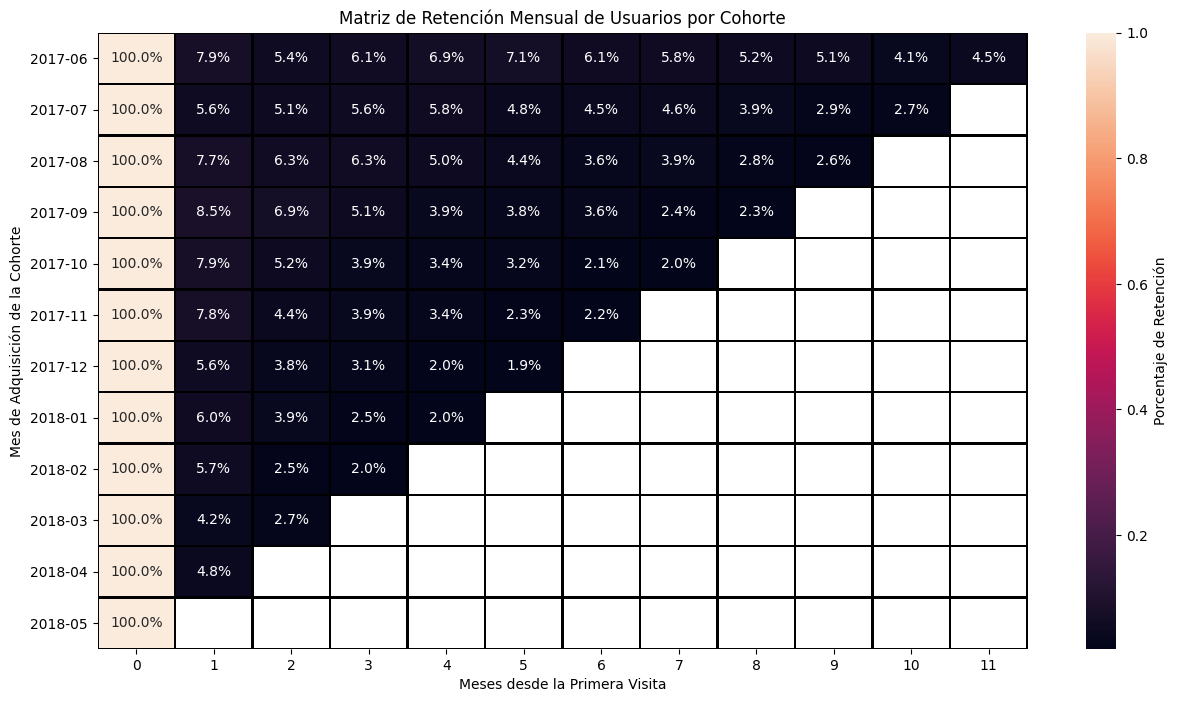

In [28]:
plt.figure(figsize=(15, 8))

sns.heatmap(retention_matrix,
            annot=True,     
            fmt=".1%",                  
            linewidths=1,  
            linecolor='black', 
            cbar_kws={'label': 'Porcentaje de Retención'}) 

plt.title('Matriz de Retención Mensual de Usuarios por Cohorte')
plt.xlabel('Meses desde la Primera Visita')
plt.ylabel('Mes de Adquisición de la Cohorte')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Claramente un Heatmap nos muestra que efectivamente debemos trabajar en abordar a los usuarios para saber cómo es la experiencia de los nuevos usuarios y si si se les está mostrando datos o valores rápidamente, o en su defecto es una plataforma dificil de leer o entender; Asi mismo evaluar temas de comunicación, como se les envía los recordatorios, ofertas, o contenido relevante para incentivarlos a regresar, o no se esta haciendo esta labor? o que otras caracterisiticas debe tener la plataforma que los motiven a volver?
</div>

# 2. Ventas:

# 1. ¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)

In [29]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

first_purchases = df_orders.groupby('uid')['buy_ts'].min().reset_index()
first_purchases.columns = ['uid', 'first_purchase_date']

user_conversion_data = first_visits.merge(first_purchases, on='uid', how='left')

user_conversion_data['time_to_convert_days'] = (
    (user_conversion_data['first_purchase_date'] - user_conversion_data['first_visit_date']).dt.days
)

print("\nUsuarios tiempo de conversión calculado:\n", user_conversion_data.dropna(subset=['time_to_convert_days']).head())

print("\nEstadísticas descriptivas tiempo de conversión (días):\n", user_conversion_data['time_to_convert_days'].describe())


Usuarios tiempo de conversión calculado:
                  uid first_visit_date first_purchase_date  \
3    313578113262317       2017-09-18 2018-01-03 21:51:00   
22  1575281904278712       2017-06-03 2017-06-03 10:13:00   
35  2429014661409475       2017-10-11 2017-10-11 18:33:00   
36  2464366381792757       2018-01-27 2018-01-28 15:54:00   
38  2551852515556206       2017-11-24 2017-11-24 10:14:00   

    time_to_convert_days  
3                  107.0  
22                   0.0  
35                   0.0  
36                   1.0  
38                   0.0  

Estadísticas descriptivas tiempo de conversión (días):
 count    36523.000000
mean        16.895901
std         47.071200
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: time_to_convert_days, dtype: float64


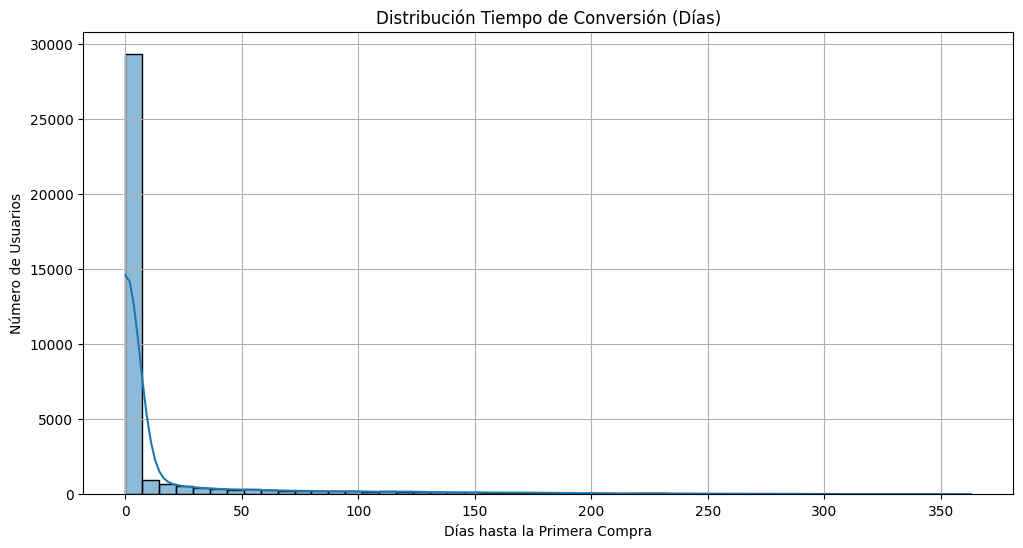

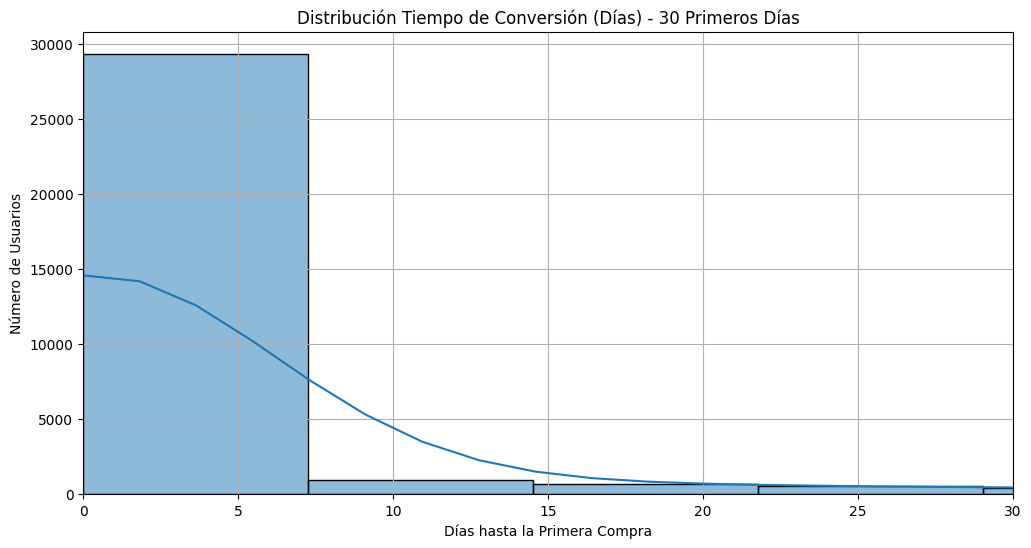

In [30]:
conversion_time_counts = user_conversion_data.dropna(subset=['time_to_convert_days']).copy()
conversion_time_counts['time_to_convert_days'] = conversion_time_counts['time_to_convert_days'].astype(int)

conversion_frequency = conversion_time_counts.groupby('time_to_convert_days')['uid'].count().reset_index()
conversion_frequency.columns = ['Días para Convertir', 'Número de Usuarios']

plt.figure(figsize=(12, 6))
sns.histplot(conversion_time_counts['time_to_convert_days'], bins=50, kde=True)
plt.title('Distribución Tiempo de Conversión (Días)')
plt.xlabel('Días hasta la Primera Compra')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(conversion_time_counts['time_to_convert_days'], bins=50, kde=True)
plt.title('Distribución Tiempo de Conversión (Días) - 30 Primeros Días')
plt.xlabel('Días hasta la Primera Compra')
plt.ylabel('Número de Usuarios')
plt.xlim(0, 30) 
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Respondiendo la pregunta, ¿Cuando empieza la gente a comprar?...La gran mayoría de los usuarios que deciden comprar lo hacen muy rápidamente, segun el dato estadistico descriptivo, el 50% de los compradores realizan su primera compra el mismo día de su primera visita, es decir el dia 0 y un 75% lo hacen dentro de los primeros 2 días; Ahora bien, el tiempo promedio de conversión es de casi 17 días, este es un dato significativamente relevante que va de la mano con un pequeño grupo de usuarios que tardan mucho más tiempo, hasta un año! (Tema a inverstigar por supuesto!); Refiere tambien algunos valores atipicos con tendencia hacia la izquierda, generar un boxplot o una caja de vigotes realmente no fue la mejor opcion para detallar lo que pasa para esta pregunta, por consiguiente decidi realizar histogramas, uno de ellos con una vision a los primeros 30 dias del comportamiento de compra del usuario. 
</div>

# 2. ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [31]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

df_orders['purchase_month'] = df_orders['buy_ts'].dt.to_period('M')

orders_by_month = df_orders.groupby('purchase_month')['buy_ts'].count().reset_index()
orders_by_month.columns = ['Mes de Compra', 'Número de Pedidos']

print("\nPedidos por mes:\n", orders_by_month.head(12)                                                  )


Pedidos por mes:
    Mes de Compra  Número de Pedidos
0        2017-06               2354
1        2017-07               2363
2        2017-08               1807
3        2017-09               3387
4        2017-10               5679
5        2017-11               5659
6        2017-12               6218
7        2018-01               4721
8        2018-02               5281
9        2018-03               5326
10       2018-04               3273
11       2018-05               4346


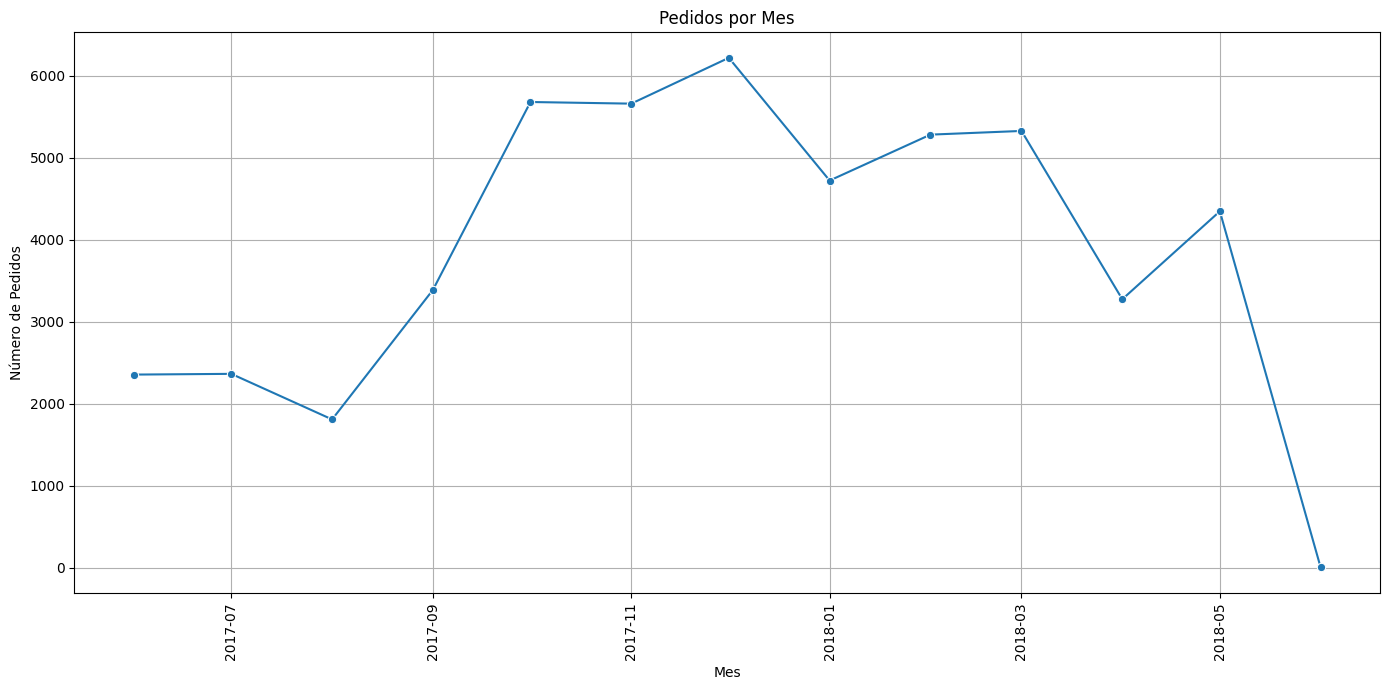

In [32]:
orders_by_month['Mes de Compra'] = orders_by_month['Mes de Compra'].dt.to_timestamp()

plt.figure(figsize=(14, 7))
sns.lineplot(data=orders_by_month, x='Mes de Compra', y='Número de Pedidos', marker='o')
plt.title('Pedidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=90) 
plt.grid(True)
plt.tight_layout() 
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El numero de pedidos esta implicito en el primer print, sin embargo realizo un grafico para denotar varias cosas, primero el inicio es estable para Junio-Julio 2017, con pedidos relativamente constantes en los primeros meses, entre 2300-2400, podria deberse a una buena campaña publicitaria o indica una fase inicial de estabilidad del negocio o un crecimiento orgánico lento, a su vez entre Agosto y Diciembre de 2017, se puede observar un crecimiento sostenido después de una ligera caída en Agosto, el número de pedidos experimenta un aumento notable a partir de Septiembre, Diciembre de 2017 con 6218 pedidos, pudo haberse promocionado por eventos especiales, suele ser asi debido a un mes de alto consumo por temas de Navidad, compras de fin de año, lanzamiento de campañas agresivas aprovechando temporada, un pico indicativo de éxito en la atracción de compras, habria que corroborarlo con el area encaragada; Una estabilidad ligera y unos altibajos entre Enero-Marzo 2018, el número de pedidos cae, esperable tras una temporada alta quizas, sin embargo, se mantiene en un rango saludable entre los 4700-5300 pedidos durante Enero, Febrero y Marzo de 2018, pudo deberse a una buena retencion por parte de la empresa, informacion que tambien se debe confirmar junto con la base de clientes activa! ; Ya para Abril-Mayo 2018 se presenta una caída Significativa, con un descenso considerable en abril, y una abrupta en mayo de 2018, llegando a un valor cercano a 0, es una caída preocupante y requiere una investigación urgente, sin embargo podría deberse a que no hay mas datos o problemas técnicos graves o eventos externos mayores que afectó la demanda o cambios drásticos en el modelo de negocio o la estrategia de marketing o problemas de inventario o suministro, lo anterior para evaluar de manera prioritaria!. 
</div>

# 3. ¿Cuál es el tamaño promedio de compra?

In [33]:
print("Primeras filas columna 'revenue':\n", df_orders['revenue'].head())
print("\nEstadísticas descriptivas columna 'revenue':\n", df_orders['revenue'].describe())

Primeras filas columna 'revenue':
 0    17.00
1     0.55
2     0.37
3     0.55
4     0.37
Name: revenue, dtype: float64

Estadísticas descriptivas columna 'revenue':
 count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64


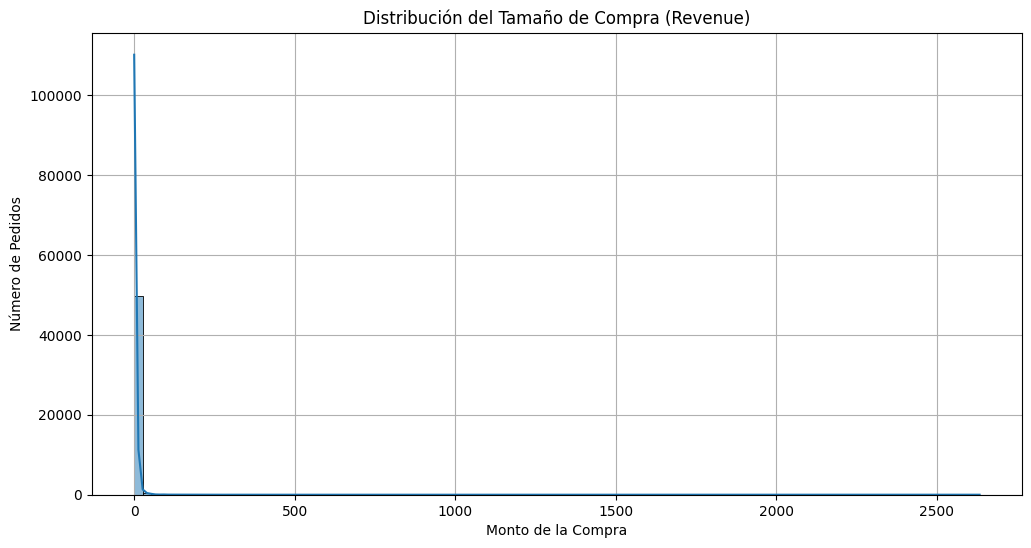

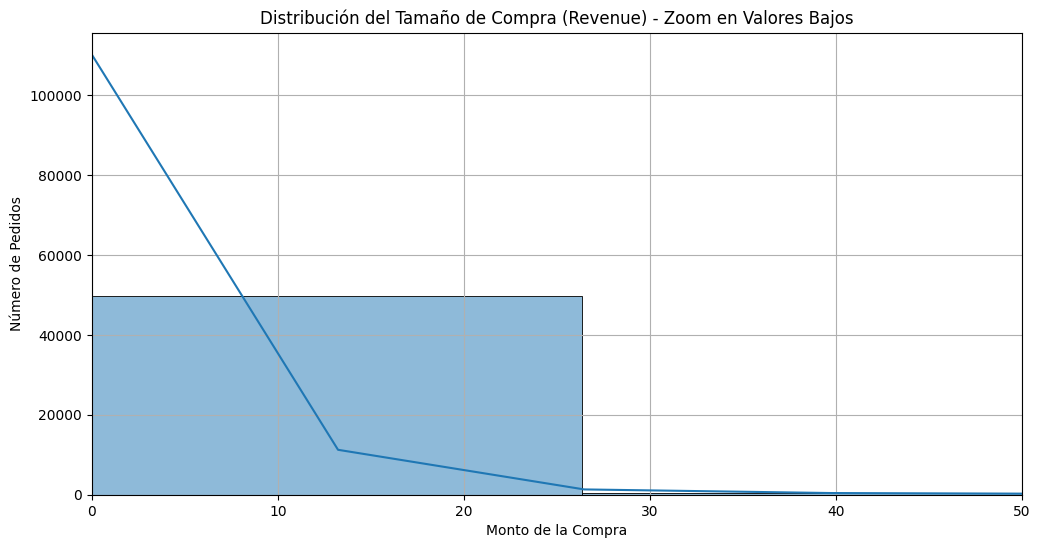

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df_orders['revenue'], bins=100, kde=True) 
plt.title('Distribución del Tamaño de Compra (Revenue)')
plt.xlabel('Monto de la Compra')
plt.ylabel('Número de Pedidos')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(df_orders['revenue'], bins=100, kde=True)
plt.title('Distribución del Tamaño de Compra (Revenue) - Zoom en Valores Bajos')
plt.xlabel('Monto de la Compra')
plt.ylabel('Número de Pedidos')
plt.xlim(0, 50) 
plt.grid(True)
plt.show()

In [35]:
orders_per_user = df_orders.groupby('uid')['buy_ts'].count().reset_index()
orders_per_user.columns = ['uid', 'total_orders']

print("Primeras filas número de pedidos por usuario:\n", orders_per_user.head())

print("\nEstadísticas descriptivas número de pedidos por usuario:\n", orders_per_user['total_orders'].describe())

Primeras filas número de pedidos por usuario:
                 uid  total_orders
0   313578113262317             1
1  1575281904278712             2
2  2429014661409475             1
3  2464366381792757             1
4  2551852515556206             2

Estadísticas descriptivas número de pedidos por usuario:
 count    36523.000000
mean         1.380363
std          3.454461
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        239.000000
Name: total_orders, dtype: float64


<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El tamaño promedio de compra por transacción es de aproximadamente 5 unidades monetarias dependiendo del valor medio de revenue, sin embargo, las estadísticas descriptivas revelan una gran dispersión en los montos de compra en std por ejemplo es de 21.82, la mayoría de compras son montos pequeños pues el 50% de las transacciones son de 2.50 o menos, y el 75% son de 4.89 o menos, mientras que existe un grupo de transacciones muy grandes, con una compra máxima de 2633.28, que eleva significativamente el promedio, muy similar a la pregunta ¿Cuando empieza la gente a comprar?, es probable que no tengan relacion entre si, si tiene un comportamiento parecido, que se ve con el histograma pero no igual o con relacion, esto evidencia de que la gran mayoría de las compras son de montos muy pequeños con frecuencias de pedidos que disminuye drásticamente a medida que el monto de la compra aumenta, volviéndose casi inexistente después de 30-40 unidades y obviamente al final de la cola que representa KDE., algo que obviamente se debe evaluar con los directivos de la empresa y que intriga con las mismas preguntas! 

Por otro lado una vision diferente seria ver la siguiente celda al grafico, en donde la gran mayoría de los usuarios compradores son clientes de una sola compra, ya que el 75% de ellos ha realizado solo 1 pedido en todo el período de los datos, pero, el promedio de 1.38 pedidos por usuario es inflado por un pequeño número de clientes altamente recurrentes que han realizado un gran volumen de pedidos, con un máximo de 239 órdenes por un solo usuario, es un dato para ver desde una perspectiva diferente!.
</div>

# 4. ¿Cuánto dinero traen? (LTV)

In [36]:
user_lifetime_value = df_orders.groupby('uid')['revenue'].sum().reset_index()
user_lifetime_value.columns = ['uid', 'total_revenue_lifetime']

print("Primeras filas ingreso total usuario (LTV individual):\n", user_lifetime_value.head())

print("\nEstadísticas descriptivas ingreso total usuario (LTV individual):\n", user_lifetime_value['total_revenue_lifetime'].describe())

Primeras filas ingreso total usuario (LTV individual):
                 uid  total_revenue_lifetime
0   313578113262317                    0.55
1  1575281904278712                    3.05
2  2429014661409475                   73.33
3  2464366381792757                    2.44
4  2551852515556206                   10.99

Estadísticas descriptivas ingreso total usuario (LTV individual):
 count    36523.000000
mean         6.901328
std         88.128535
min          0.000000
25%          1.470000
50%          3.050000
75%          5.800000
max      11810.180000
Name: total_revenue_lifetime, dtype: float64


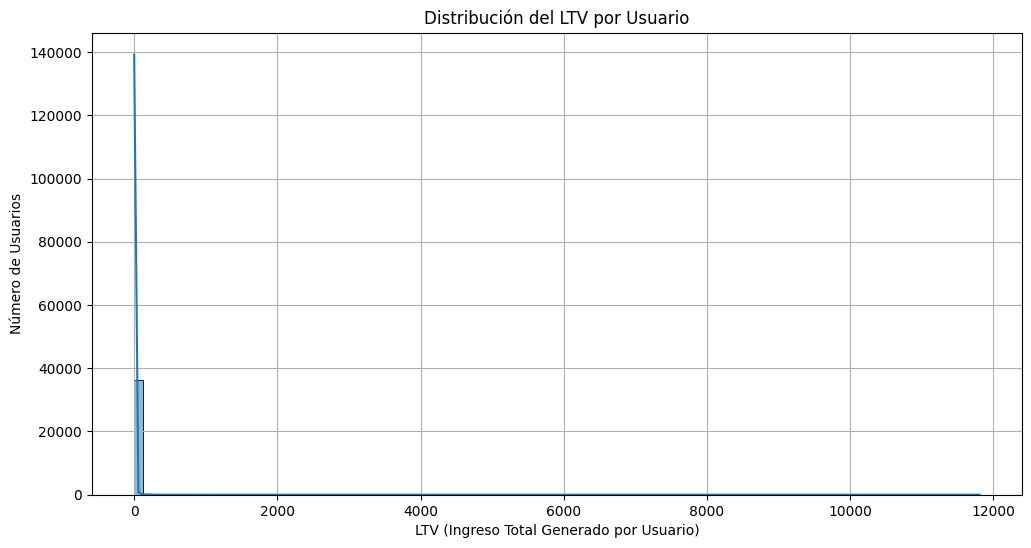

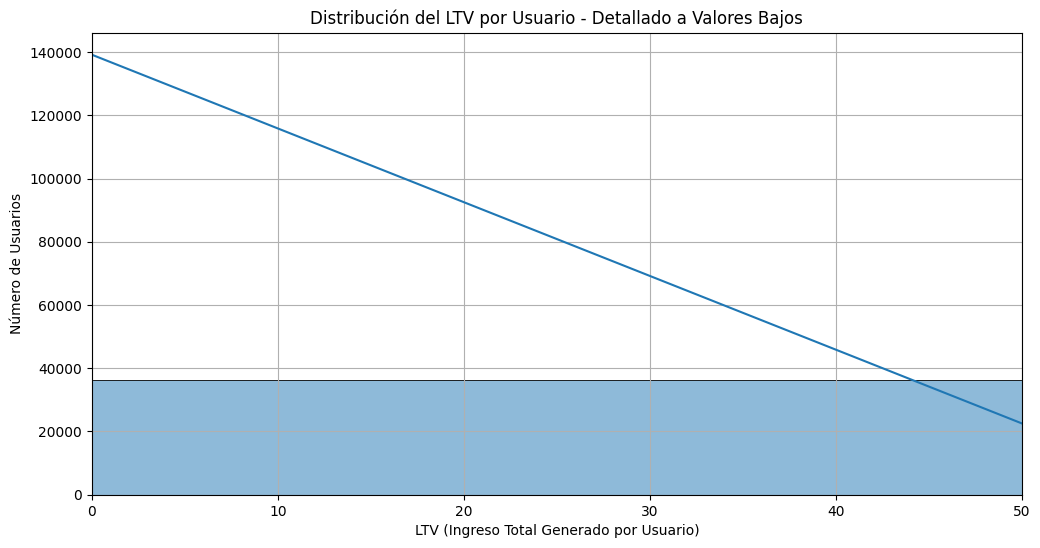

In [37]:
plt.figure(figsize=(12, 6))
sns.histplot(user_lifetime_value['total_revenue_lifetime'], bins=100, kde=True)
plt.title('Distribución del LTV por Usuario')
plt.xlabel('LTV (Ingreso Total Generado por Usuario)')
plt.ylabel('Número de Usuarios')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(user_lifetime_value['total_revenue_lifetime'], bins=100, kde=True)
plt.title('Distribución del LTV por Usuario - Detallado a Valores Bajos')
plt.xlabel('LTV (Ingreso Total Generado por Usuario)')
plt.ylabel('Número de Usuarios')
plt.xlim(0, 50) 
plt.grid(True)
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El LTV histórico es de aproximadamente 6.90 unidades monetarias, sin embargo, este promedio es nuevamente influenciado por un pequeño grupo de clientes de muy alto valor, ya que el LTV máximo registrado es de 11,810.18 y la mayoría de los clientes, por el contrario, generan un LTV mucho menor, con la mediana en solo 3.05 unidades monetarias, indica que el 50% de los clientes aportan 3.05 o menos en su 'vida' como compradores; Los histogramas confirman la fuerte asimetría y el sesgo a la derecha de los datos que disminuye drásticamente a medida que el LTV aumenta, mostrando a la gran mayoría de los usuarios generando un LTV modesto, la otra cara de la moneda nos muestra una distribución muy larga al finazliar, representada en una extensión constante de la curva hacia el valor mas alto, dejandonos ver que este pequeño segmento de clientes de muy alto valor, aunque pocos, impactan significativamente el LTV promedio.
</div>

# 3. Marketing:

# 1. ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo) 


Dinero TOTAL gastado: 329131.62 unidades monetarias


Dinero gastado a lo largo del tiempo (mensual):
           Mes  Costo Total Mensual
0  2017-06-01             18015.00
1  2017-07-01             18240.59
2  2017-08-01             14790.54
3  2017-09-01             24368.91
4  2017-10-01             36322.88
5  2017-11-01             37907.88
6  2017-12-01             38315.35
7  2018-01-01             33518.52
8  2018-02-01             32723.03
9  2018-03-01             30415.27
10 2018-04-01             22289.38
11 2018-05-01             22224.27


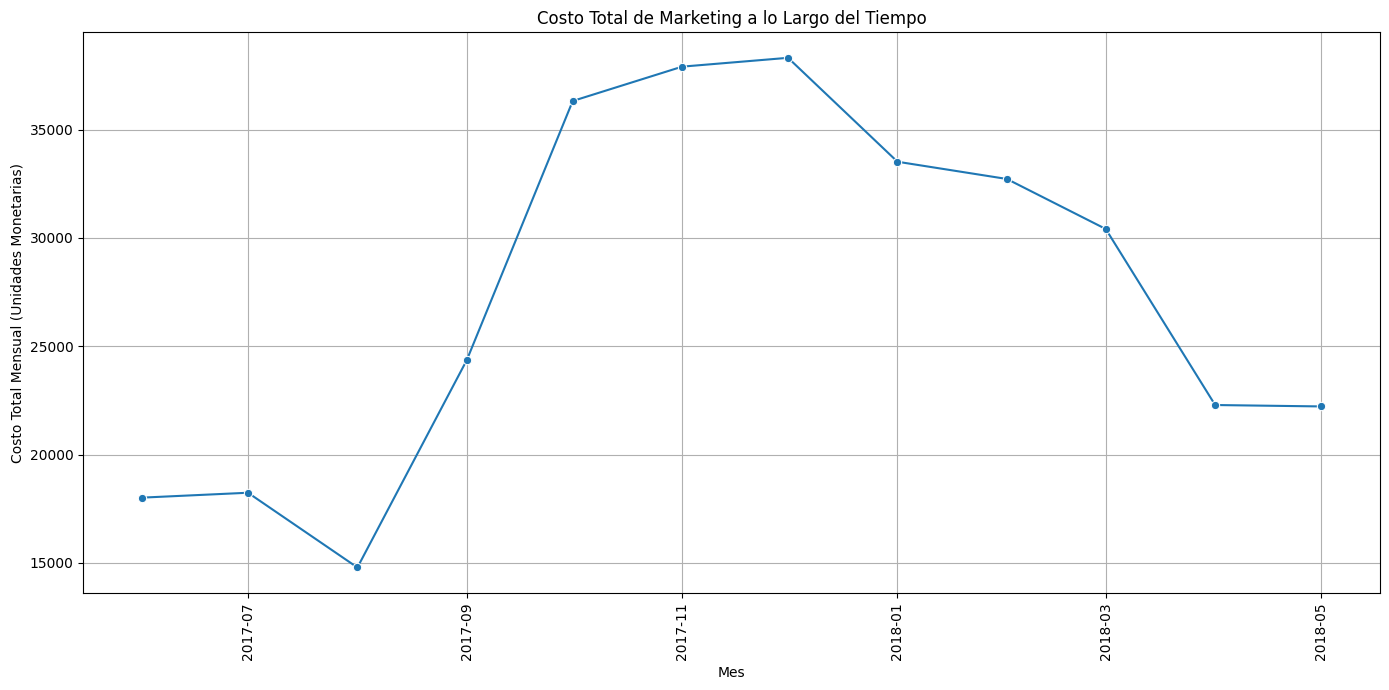

In [38]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs['month'] = df_costs['dt'].dt.to_period('M')

total_spent = df_costs['costs'].sum()
print(f"\nDinero TOTAL gastado: {total_spent:.2f} unidades monetarias")
print()

costs_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['Fuente de Adquisición', 'Costo Total']

costs_over_time = df_costs.groupby('month')['costs'].sum().reset_index()
costs_over_time.columns = ['Mes', 'Costo Total Mensual']

costs_over_time['Mes'] = costs_over_time['Mes'].dt.to_timestamp()

print("\nDinero gastado a lo largo del tiempo (mensual):\n", costs_over_time.head(12))

plt.figure(figsize=(14, 7))
sns.lineplot(data=costs_over_time, x='Mes', y='Costo Total Mensual', marker='o')
plt.title('Costo Total de Marketing a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Costo Total Mensual (Unidades Monetarias)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El dinero total gastado en marketing en el período observado es de 329131.62 unidades monetarias, este gasto en marketing mostró una tendencia creciente desde junio a diciembre de 2017, alcanzando un pico de 38,315.35 en Diciembre, escalada en inversión correlacionada al parecer con el aumento en el volumen de pedidos durante el mismo período, luego los gastos disminuyeron en el segundo trimestre de 2018, lo que coincide con una baja en la actividad de pedidos.
</div>

# 2. ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?


Costo de Adquisición de Clientes (CAC) por Fuente (cac_data):
    source_id  Costo Total  num_acquired_customers        CAC
2          3    141321.63                   10473  13.493901
1          2     42806.04                    3506  12.209367
4          5     51757.10                    6931   7.467479
0          1     20833.27                    2899   7.186364
3          4     61073.60                   10296   5.931779
5          9      5517.49                    1088   5.071222
6         10      5822.49                    1329   4.381106


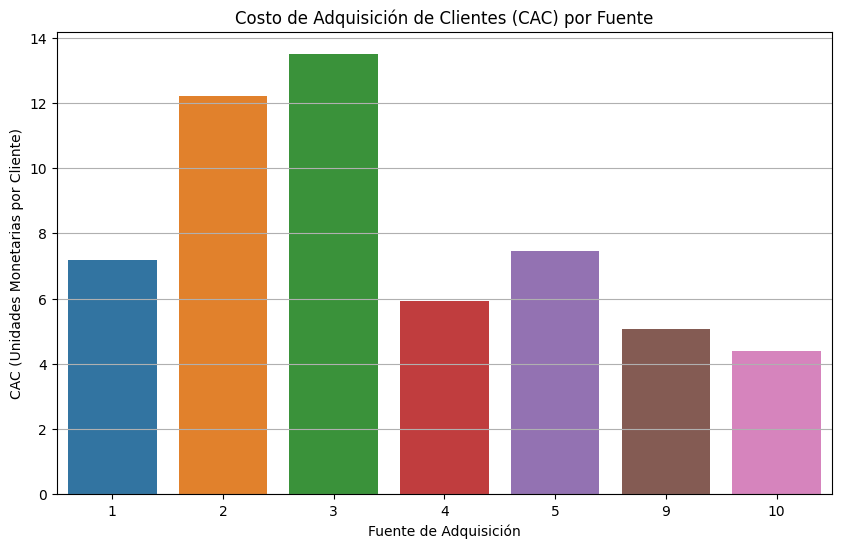

In [39]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'])
df_costs['month'] = df_costs['dt'].dt.to_period('M')

costs_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'Costo Total']

df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])

first_visits = df_visits.loc[df_visits.groupby('uid')['start_ts'].idxmin()]
first_visits = first_visits[['uid', 'source_id', 'start_ts']].copy() 
first_visits.columns = ['uid', 'first_source_id', 'first_visit_ts']

df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])

first_purchases = df_orders.loc[df_orders.groupby('uid')['buy_ts'].idxmin()]
first_purchases = first_purchases[['uid', 'buy_ts']].copy()
first_purchases.columns = ['uid', 'first_purchase_ts']

acquired_customers = pd.merge(first_visits, first_purchases, on='uid', how='inner')
acquired_customers = acquired_customers[acquired_customers['first_visit_ts'] <= acquired_customers['first_purchase_ts']]
acquired_customers['acquisition_month'] = acquired_customers['first_purchase_ts'].dt.to_period('M')

customers_by_source = acquired_customers.groupby('first_source_id')['uid'].nunique().reset_index()
customers_by_source.columns = ['source_id', 'num_acquired_customers']

cac_data = pd.merge(costs_by_source, customers_by_source, on='source_id', how='left')
cac_data['CAC'] = cac_data['Costo Total'] / cac_data['num_acquired_customers']
cac_data.loc[cac_data['num_acquired_customers'].isna() | (cac_data['num_acquired_customers'] == 0), 'CAC'] = 0

print("\nCosto de Adquisición de Clientes (CAC) por Fuente (cac_data):\n", cac_data.sort_values(by='CAC', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(data=cac_data, x='source_id', y='CAC')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('CAC (Unidades Monetarias por Cliente)')
plt.grid(axis='y')
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El Costo de Adquisición de Clientes (CAC) varía significativamente entre las diferentes fuentes de marketing, sin embargo la Fuente 3, la barra de color verde, presenta el CAC más alto 13.49 unidades monetarias por cliente, seguida de cerca por la Fuente 2, la barra de color naranja con un dato de 12.21, por otro lado, las fuentes más eficientes en términos de costo son la Fuente 10 con un 4.38, la Fuente 9 con un 5.07 y la Fuente 4 con un 5.93, se debe destacar que la Fuente 4 logra un gran volumen de adquisición de clientes con un CAC relativamente bajo, sugiriendo una alta eficiencia en su gasto segun lo muestran los datos y la grafica.
</div>

# 3. ¿Cuán rentables eran las inversiones? (ROMI)


Rentabilidad Inversiones (ROMI) por Fuente (romi_data):
    source_id  Costo Total  Ingreso Total Generado      ROMI
0          1     20833.27                31090.55  0.492351
1          2     42806.04                46923.61  0.096191
5          9      5517.49                 5759.40  0.043844
4          5     51757.10                52624.02  0.016750
3          4     61073.60                56696.83 -0.071664
6         10      5822.49                 4450.33 -0.235665
2          3    141321.63                54511.24 -0.614275




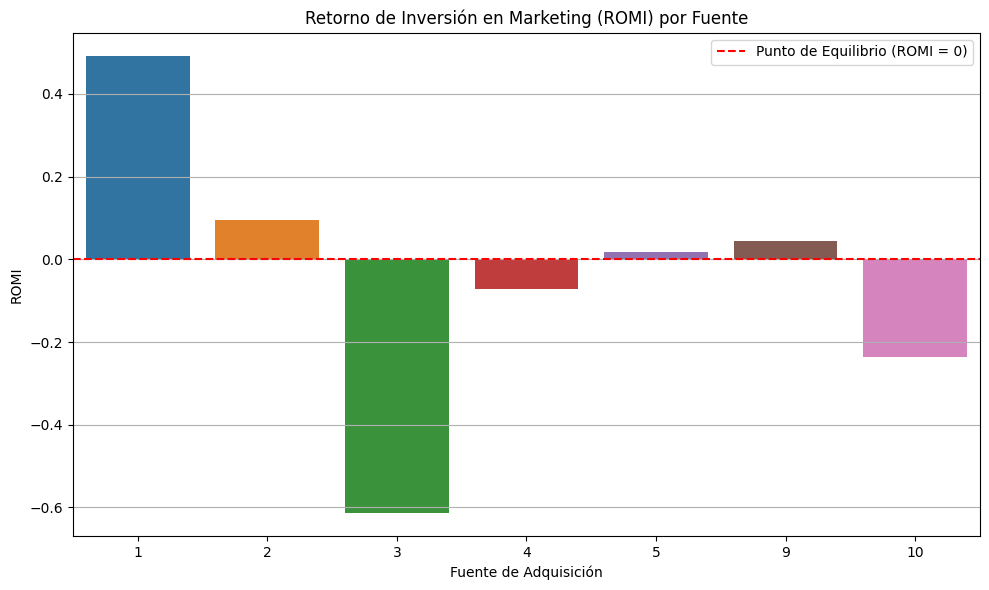

In [40]:
customer_revenue_by_source = pd.merge(acquired_customers, user_lifetime_value, on='uid', how='inner')

revenue_by_source = customer_revenue_by_source.groupby('first_source_id')['total_revenue_lifetime'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'Ingreso Total Generado']

romi_data = pd.merge(costs_by_source, revenue_by_source, on='source_id', how='left')
romi_data['Costo Total'] = pd.to_numeric(romi_data['Costo Total'], errors='coerce')
romi_data['Ingreso Total Generado'] = pd.to_numeric(romi_data['Ingreso Total Generado'], errors='coerce')
romi_data['ROMI'] = (romi_data['Ingreso Total Generado'] - romi_data['Costo Total']) / romi_data['Costo Total']

print("\nRentabilidad Inversiones (ROMI) por Fuente (romi_data):\n", romi_data.sort_values(by='ROMI', ascending=False))
print()
print()

plt.figure(figsize=(10, 6))
sns.barplot(data=romi_data, x='source_id', y='ROMI')
plt.title('Retorno de Inversión en Marketing (ROMI) por Fuente')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('ROMI')
plt.grid(axis='y')
plt.axhline(y=0, color='r', linestyle='--', label='Punto de Equilibrio (ROMI = 0)')
plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
El análisis del ROMI revela una rentabilidad mixta y variada entre las diferentes fuentes de adquisición, ya que las fuentes más rentables son la Fuente 1 con un ROMI: 0.49 generando casi un 50% de retorno sobre la inversión, seguida por la Fuente 2 con un ROMI: 0.096 y en menor medida, la Fuente 9 con un ROMI: 0.044 y la Fuente 5 con un ROMI: 0.017 estas están generando más ingresos de lo que cuestan en marketing, un buen dato para el area que acerto, pero varias fuentes no son rentables y generan pérdidas, como la Fuente 3, de lejos la de peor de todas en cuanto a rendimiento, con un ROMI de -0.614, lo que significa que por cada unidad monetaria invertida, la empresa pierde más de la mitad de esa inversión! ahora otras fuentes no rentables incluyen la Fuente 10 y la Fuente 4; Son valores críticos para la optimización del presupuesto de marketing, la empresa debe considerar redirigir la inversión de las fuentes con ROMI negativo, especialmente la Fuente 3 o investigar a fondo las razones de la baja rentabilidad de las fuentes con deficit para intentar optimizarlas.
</div>

# Traza gráficos para mostrar cómo difieren estas métricas para varios dispositivos y fuentes de anuncios y cómo cambian con el tiempo. 


CAC a lo largo del tiempo (mensual):
          Mes  Costo Total Mensual  Num_Adquiridos  CAC_Mensual
0 2017-06-01             18015.00            2023     8.905091
1 2017-07-01             18240.59            1923     9.485486
2 2017-08-01             14790.54            1370    10.796015
3 2017-09-01             24368.91            2581     9.441654
4 2017-10-01             36322.88            4340     8.369327




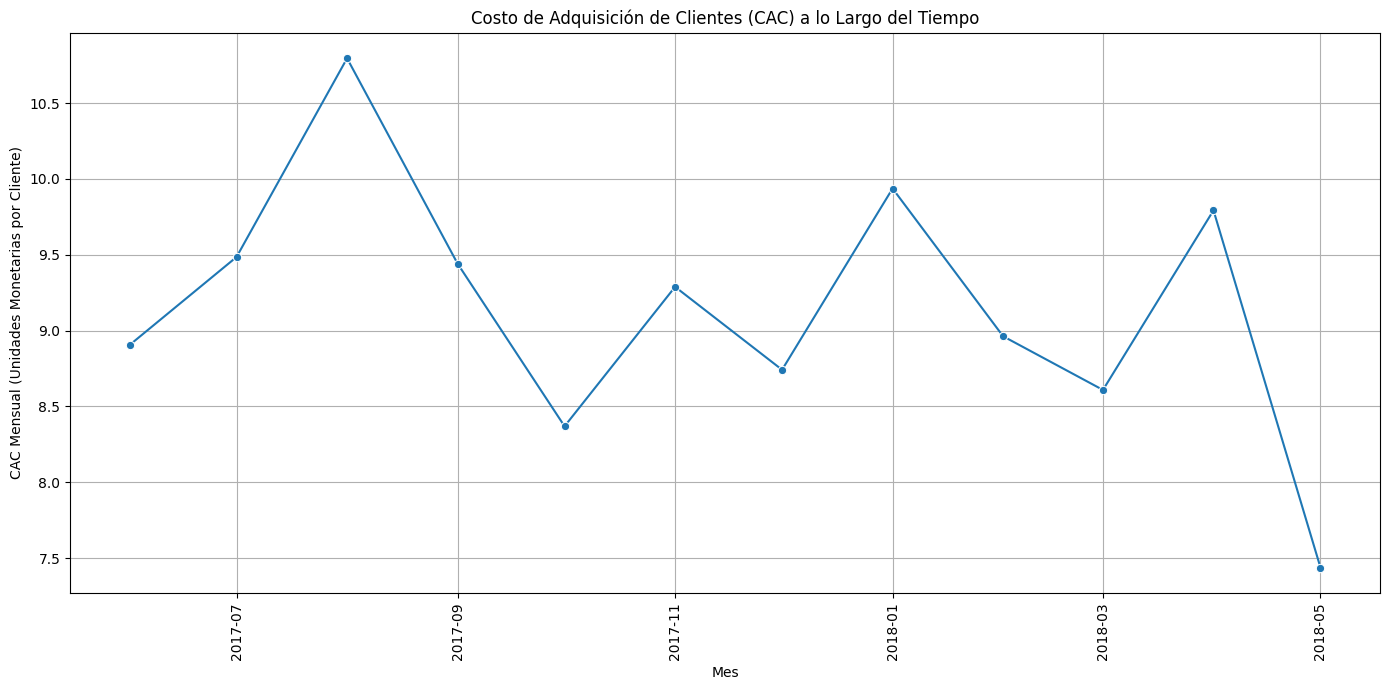

In [41]:
customers_by_month = acquired_customers.groupby('acquisition_month')['uid'].nunique().reset_index()
customers_by_month.columns = ['Mes', 'Num_Adquiridos']
customers_by_month['Mes'] = customers_by_month['Mes'].dt.to_timestamp()

cac_over_time = pd.merge(costs_over_time, customers_by_month, on='Mes', how='left')
cac_over_time['CAC_Mensual'] = cac_over_time['Costo Total Mensual'] / cac_over_time['Num_Adquiridos']
cac_over_time.loc[cac_over_time['Num_Adquiridos'].isna() | (cac_over_time['Num_Adquiridos'] == 0), 'CAC_Mensual'] = 0

print("\nCAC a lo largo del tiempo (mensual):\n", cac_over_time.head())
print()
print()

plt.figure(figsize=(14, 7))
sns.lineplot(data=cac_over_time, x='Mes', y='CAC_Mensual', marker='o')
plt.title('Costo de Adquisición de Clientes (CAC) a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('CAC Mensual (Unidades Monetarias por Cliente)')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


Ingreso total de clientes adquiridos por mes:
          Mes  Ingreso Total Adquirido Mensual
0 2017-06-01                         24031.69
1 2017-07-01                         16127.92
2 2017-08-01                         11606.26
3 2017-09-01                         34676.32
4 2017-10-01                         27603.45



ROMI a lo largo del tiempo (mensual):
          Mes  Costo Total Mensual  Ingreso Total Adquirido Mensual  \
0 2017-06-01             18015.00                         24031.69   
1 2017-07-01             18240.59                         16127.92   
2 2017-08-01             14790.54                         11606.26   
3 2017-09-01             24368.91                         34676.32   
4 2017-10-01             36322.88                         27603.45   

   ROMI_Mensual  
0      0.333982  
1     -0.115822  
2     -0.215292  
3      0.422974  
4     -0.240053  




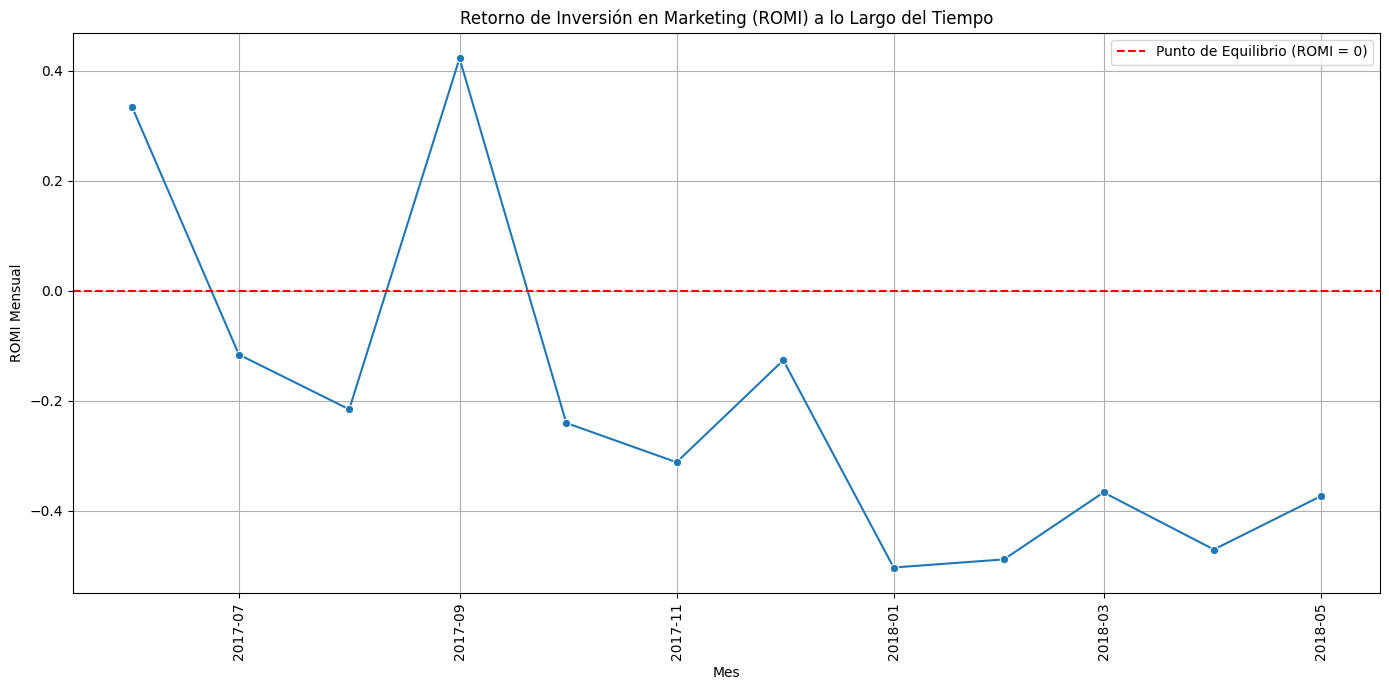

In [42]:
revenue_by_acquisition_month = customer_revenue_by_source.groupby('acquisition_month')['total_revenue_lifetime'].sum().reset_index()
revenue_by_acquisition_month.columns = ['Mes', 'Ingreso Total Adquirido Mensual']
revenue_by_acquisition_month['Mes'] = revenue_by_acquisition_month['Mes'].dt.to_timestamp()

print("\nIngreso total de clientes adquiridos por mes:\n", revenue_by_acquisition_month.head())
print()
print()

romi_over_time = pd.merge(costs_over_time, revenue_by_acquisition_month, on='Mes', how='left')
romi_over_time['ROMI_Mensual'] = (romi_over_time['Ingreso Total Adquirido Mensual'] - romi_over_time['Costo Total Mensual']) / romi_over_time['Costo Total Mensual']
romi_over_time.loc[romi_over_time['Costo Total Mensual'] == 0, 'ROMI_Mensual'] = 0 
romi_over_time.loc[romi_over_time['Ingreso Total Adquirido Mensual'].isna(), 'ROMI_Mensual'] = -1 

print("\nROMI a lo largo del tiempo (mensual):\n", romi_over_time.head())
print()
print()

plt.figure(figsize=(14, 7))
sns.lineplot(data=romi_over_time, x='Mes', y='ROMI_Mensual', marker='o')
plt.title('Retorno de Inversión en Marketing (ROMI) a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('ROMI Mensual')
plt.xticks(rotation=90)
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--', label='Punto de Equilibrio (ROMI = 0)')
plt.legend()
plt.tight_layout()
plt.show()


Número de clientes adquiridos por dispositivo:
   Dispositivo  Num_Clientes_Adquiridos
0     desktop                    29211
1       touch                     7312



Ingreso total generado por dispositivo:
   Dispositivo  Ingreso_Total_Generado
0     desktop               211329.77
1       touch                40727.43




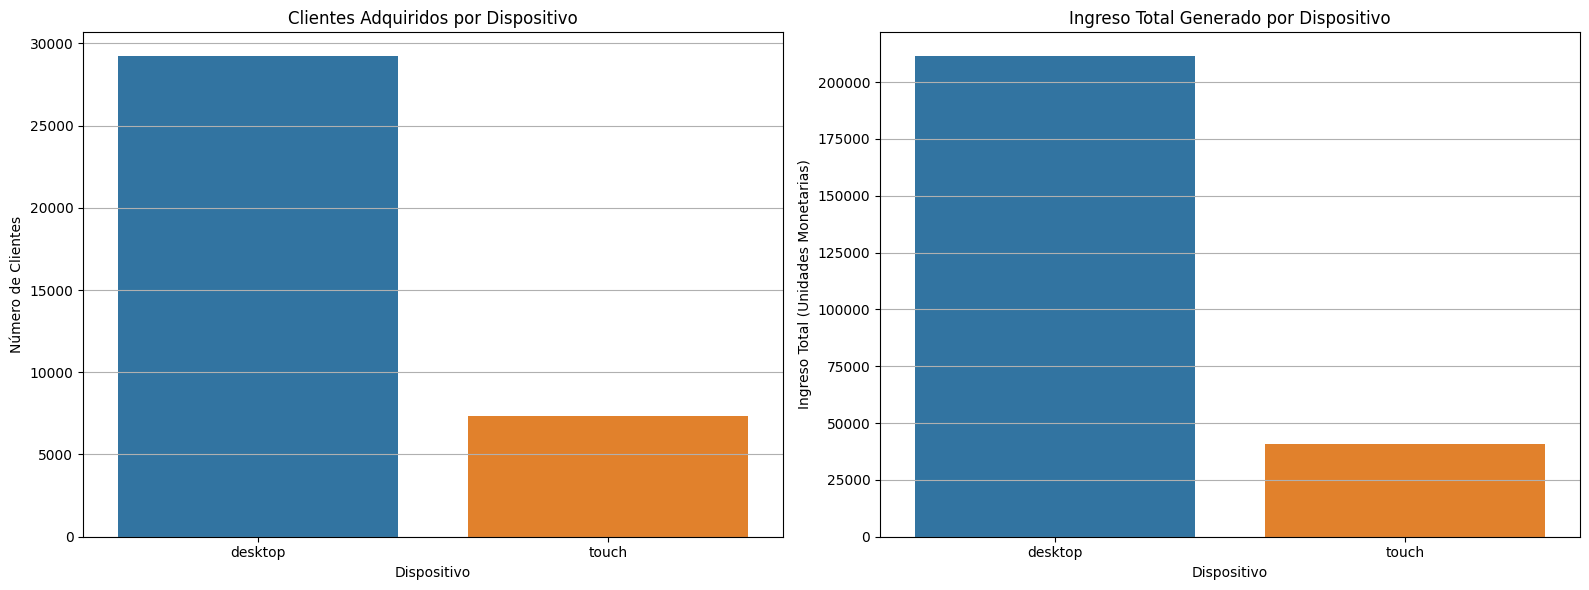

In [45]:
first_visits_with_device = df_visits.loc[df_visits.groupby('uid')['start_ts'].idxmin()]
first_visits_with_device = first_visits_with_device[['uid', 'device', 'source_id', 'start_ts']].copy()
first_visits_with_device.columns = ['uid', 'first_device', 'source_id_visit', 'first_visit_ts'] 

user_lifetime_value = df_orders.groupby('uid')['revenue'].sum().reset_index()
user_lifetime_value.columns = ['uid', 'total_revenue_lifetime']

customer_data_by_device = pd.merge(first_visits_with_device, user_lifetime_value, on='uid', how='inner')

customers_by_device = customer_data_by_device.groupby('first_device')['uid'].nunique().reset_index()
customers_by_device.columns = ['Dispositivo', 'Num_Clientes_Adquiridos']
print("\nNúmero de clientes adquiridos por dispositivo:\n", customers_by_device.sort_values(by='Num_Clientes_Adquiridos', ascending=False))
print()
print()

revenue_by_device = customer_data_by_device.groupby('first_device')['total_revenue_lifetime'].sum().reset_index()
revenue_by_device.columns = ['Dispositivo', 'Ingreso_Total_Generado']
print("\nIngreso total generado por dispositivo:\n", revenue_by_device.sort_values(by='Ingreso_Total_Generado', ascending=False))
print()
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(data=customers_by_device, x='Dispositivo', y='Num_Clientes_Adquiridos', ax=axes[0])
axes[0].set_title('Clientes Adquiridos por Dispositivo')
axes[0].set_xlabel('Dispositivo')
axes[0].set_ylabel('Número de Clientes')
axes[0].grid(axis='y')

sns.barplot(data=revenue_by_device, x='Dispositivo', y='Ingreso_Total_Generado', ax=axes[1])
axes[1].set_title('Ingreso Total Generado por Dispositivo')
axes[1].set_xlabel('Dispositivo')
axes[1].set_ylabel('Ingreso Total (Unidades Monetarias)')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

# Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

# ¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

<div class="alert alert-block alert-info">
<b>Comentario del estudiante</b> <a class=“tocSkip”></a>
Basádo en un análisis exhaustivo de CAC y ROMI, así como tambien el rendimiento por dispositivo, recomendaria lo siguiente para optimizar la inversión:

-Reasignar si o si el presupuesto de marketing de la Fuente 3, es un despilfarro de dinero que debe ser detenido o reevaluado drásticamente.
-Aumentar la inversión en la Fuente 1. ya que es la fuente más rentable, explorar su escalabilidad para maximizar el crecimiento rentable.
-Optimizar las Fuentes 4 y 10 por su volumen de clientes con un CAC bajo, ambas con ROMI negativos pero con posibilidades de una rentabilidad que acompañe al volumen/costo.
-Mantener la inversión en las Fuentes 2, 5 y 9, pero prestando atencion y haciendole seguimiento por sus retornos moderados, podria buscarse una eficiencia o crear estrategias para mejorar la rentabilidad sin aumentar el riesgo.
-Priorizar la experiencia y la inversión en Desktop, son la principal fuente de clientes adquiridos con un valor de 29,211 y de ingresos generados por 211,329.77 unidades monetarias, hay que asegurar que las campañas dirigidas a este canal sigan siendo robustas y la experiencia de usuario óptima.

Por otro lado muestra que un CAC bajo no siempre se traduce en un ROMI positivo, de esto el ejemplo de la Fuente 4, es por esto la importancia de evaluar la calidad de los clientes y sus ingresos a largo plazo, adicional a eso la Fuente 3 es un claro ejemplo de una inversión ineficiente, a pesar de adquirir muchos clientes, el alto costo y el bajo ingreso de esos clientes la hacen muy poco rentable, por ello la Fuente 1 es un modelo de éxito al ser eficiente en costo y altamente rentable, diria que la preponderancia de desktop en adquisición de clientes e ingresos subraya la importancia de este canal.
</div>